In [74]:
import numpy as np

In [75]:
def activation_ReLU(x):
    return np.maximum(0, x)

def activation_Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def activation_Tanh(x):
    return np.tanh(x)

def activation_Softmax(x):
    max_x = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
    return exp_x / sum_exp_x


In [76]:
a = np.array([[0.9, 0.1, 0.8],
             [0.3, 0.5, 0.2],
             [0.4, 0.5, 0.7],
             [0.1, 0.4, 0.6]])
w = np.array([[0.2, -0.5, 0.3, -0.1],
             [0.1, 0.4, -0.2, 0.6],
             [-0.2, -0.1, 0.3, 0.4]])
# 输入的列数要和权重的行数相同

# bias的个数要和权重的行数相同
b = 0.3

# 权重的列数为神经元的个数，行数为输入的个数

sum1 = np.dot(a, w) + b
a1 = activation_ReLU(sum1)
# a1的维度是4*4，因为a的维度是4*3，w的维度是3*4，b的维度是1*4
a1

array([[0.33, 0.  , 0.79, 0.59],
       [0.37, 0.33, 0.35, 0.65],
       [0.29, 0.23, 0.53, 0.84],
       [0.24, 0.35, 0.43, 0.77]])

In [77]:
def create_weights(n_inputs, n_neurons):
    return np.random.randn(n_inputs, n_neurons)

def create_bias(n_neurons):
    return np.random.randn(n_neurons)

In [78]:
weights1 = create_weights(3, 4)
bias1 = create_bias(4)

weights2 = create_weights(4, 5)
bias2 = create_bias(5)

weights3 = create_weights(5, 2)
bias3 = create_bias(2)

sum1 = np.dot(a, weights1) + bias1
a1 = activation_ReLU(sum1)

sum2 = np.dot(a1, weights2) + bias2
a2 = activation_ReLU(sum2)

sum3 = np.dot(a2, weights3) + bias3
a3 = activation_Sigmoid(sum3)

a3

array([[0.14797989, 0.40458472],
       [0.12911064, 0.47774843],
       [0.18630046, 0.59748085],
       [0.17073139, 0.58791183]])

将权重与偏置，放入面向对象的类中

**面向对象的层**

In [79]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.biases = np.random.randn(n_neurons)
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

layer1 = Layer_Dense(3, 4)
layer2 = Layer_Dense(4, 5)
layer3 = Layer_Dense(5, 2)

layer1.forward(a)
layer2.forward(layer1.output)
layer3.forward(layer2.output)
layer3.output

array([[ -2.54774317, -12.84125232],
       [  0.23294285,  -4.02344618],
       [ -0.33000459,  -5.01745707],
       [ -0.45468067,  -3.32727836]])

**面向对象的网络**

In [80]:
NET_SHAPE = [3, 4, 5, 2]

class NeuralNetwork:
    def __init__(self, net_shape):
        self.layers = []
        for i in range(len(net_shape) - 1):
            self.layers.append(Layer_Dense(net_shape[i], net_shape[i + 1]))
        self.shape = net_shape

    def forward(self, inputs):
        outputs = [inputs]
        for layer in self.layers[:-1]:
            layer.forward(outputs[-1])
            layer.output = activation_ReLU(layer.output)
            outputs.append(layer.output)
        self.layers[-1].forward(outputs[-1])
        self.layers[-1].output = activation_Sigmoid(self.layers[-1].output)
        outputs.append(self.layers[-1].output)
        return outputs[-1]
    
    def classify(self):
        return np.rint(self.layers[-1].output)


In [81]:
network = NeuralNetwork(NET_SHAPE)
print(network.shape)
print(network.layers[0].weights)
print(network.layers[1].biases)
print(network.layers[2].weights)

network.forward(a)

[3, 4, 5, 2]
[[-2.74507617  2.30905463  0.91922208  2.06164935]
 [-1.07710096 -1.48545151  1.22131402  1.02570466]
 [ 0.16963545 -0.21297329  0.96318126 -1.06936083]]
[ 1.16325889  0.51010981 -0.80904574  0.47201198 -0.91121095]
[[-1.52763441 -0.16877205]
 [ 0.02272969  0.14435507]
 [-1.19988982 -1.03338064]
 [-0.78601871  1.0385073 ]
 [-0.86221807 -0.6965939 ]]


array([[0.00371146, 0.08923795],
       [0.00517741, 0.58488855],
       [0.00136414, 0.41355888],
       [0.00678788, 0.54430139]])

ReLU激活函数不适合输出层，因为输出层的值要符合概率分布，需要在0-1之间，所以使用Sigmoid/SoftMax激活函数

In [82]:
def activation_Softmax(x):
    max_x = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
    return exp_x / sum_exp_x

Softmax为何要减去最大值（向左平移）：防止指数爆炸，因为指数函数的值会很大，所以减去最大值，可以让指数函数的值变小，同时不改变$dx$相同时，$e^{dx}$指数的比值

**数据的标准化**

In [83]:
def normalize(x):
    max_x = np.max(np.absolute(x), axis=1, keepdims=True)
    scale_rate = np.where(max_x == 0, 1, 1/max_x)
    return x * scale_rate

**数据生成**


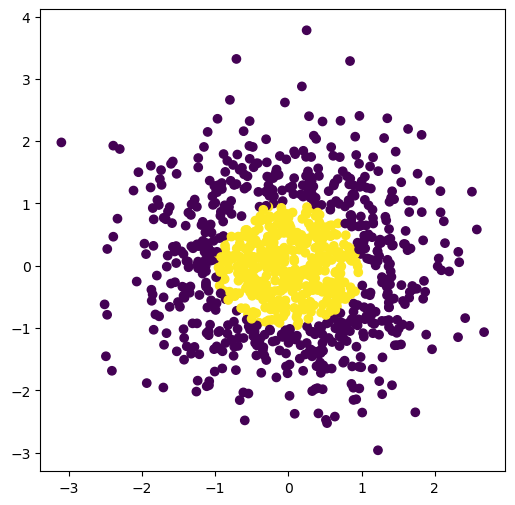

In [84]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

N_DATA = 100
N_DIM = 2

def create_data(n_data, n_dim):
    x = np.random.randn(n_data, n_dim)
    y = np.zeros((n_data, 1))
    for i in range(n_data):
        if np.square(x[i][0]) + np.square(x[i][1]) < 1:
            y[i][0] = 1
        else:
            y[i][0] = 0
    return np.concatenate((x, y), axis=1)

plt.figure(figsize=(6,6))
data = create_data(1000, N_DIM)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()


In [85]:
data = create_data(N_DATA, N_DIM)
inputs = data[:, :N_DIM]
labels = data[:, N_DIM:]

network = NeuralNetwork([N_DIM, 10, 10, 1])
network.forward(inputs)
network.classify()



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],